<a href="https://colab.research.google.com/github/AlessandraSalanitri/Analytics-and-Business-Intelligence/blob/main/Pandas%2CMatplotlib%2CSeaborn%2C_Sklearn_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas,Matplotlib,Seaborn, Sklearn Visualization

Pre-processing, correlation, linear regression, train/test split


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.isnull()
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
print("Before Cleaning:")
print(titanic.info())

# Drop duplicates
titanic.drop_duplicates(inplace=True)

# Drop null values
titanic.dropna(inplace=True)

# Display information about the cleaned dataset
print("\nClean Dataset:")
print(titanic.info())

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Clean Dataset:
<class 'pandas.core.frame.DataFrame'>
Int

In [ ]:
titanic.rename( columns = {'pclass' : 'passenger_class' ,
                           'sex' : 'gender' ,
                           'sibsp' : 'siblings_or_spouse' ,
                           'embarked' : 'embark_port',
                           'embark_town' : 'town_embarkation',
                           'parch' : 'parent_or_children',
                           'adult_male' : 'adult',
                           'who' : 'individual'}, inplace = True)

In [ ]:
titanic["gender"].value_counts()

male      94
female    87
Name: gender, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

le_adult = LabelEncoder()
le_alone = LabelEncoder()
le_gender = LabelEncoder()
le_alive = LabelEncoder()
le_town_embarkation= LabelEncoder()

le_adult.fit(titanic['adult'].drop_duplicates())
le_alone.fit(titanic['alone'].drop_duplicates())
le_gender.fit(titanic['gender'].drop_duplicates())
le_alive.fit(titanic['alive'].drop_duplicates())
le_town_embarkation.fit(titanic['town_embarkation'].drop_duplicates())

titanic['adult_enc'] = le_adult.transform(titanic['adult'])
titanic['alone_enc'] = le_alone.transform(titanic['alone'])
titanic['gender_enc'] = le_gender.transform(titanic['gender'])
titanic['alive_enc'] = le_alive.transform(titanic['alive'])
titanic['town_embarkation_enc'] = le_town_embarkation.transform(titanic['town_embarkation'])
titanic

,survived,passenger_class,gender,age,siblings_or_spouse,parent_or_children,fare,embark_port,class,individual,adult,deck,town_embarkation,alive,alone,adult_enc,alone_enc,gender_enc,alive_enc,town_embarkation_enc
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,0,1,2
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1,1,1,0,2
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,0,0,0,1,2
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,0,0,0,1,2
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True,1,1,1,0,2
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,0,0,0,1,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,1,0,1,2


In [ ]:
ct = ColumnTransformer( [ ('ohe', OneHotEncoder(), ['town_embarkation']) ], remainder='passthrough' )

trans = ct.fit_transform(titanic)
trans

array([[1.0, 0.0, 0.0, ..., 0, 1, 0],
       [0.0, 0.0, 1.0, ..., 0, 1, 2],
       [0.0, 0.0, 1.0, ..., 1, 0, 2],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 0],
       [0.0, 0.0, 1.0, ..., 0, 1, 2],
       [1.0, 0.0, 0.0, ..., 1, 1, 0]], dtype=object)

In [ ]:
ins_titanic = pd.DataFrame(trans, columns=ct.get_feature_names_out())

list(ins_titanic.columns)

['ohe__town_embarkation_Cherbourg',
 'ohe__town_embarkation_Queenstown',
 'ohe__town_embarkation_Southampton',
 'remainder__survived',
 'remainder__passenger_class',
 'remainder__gender',
 'remainder__age',
 'remainder__siblings_or_spouse',
 'remainder__parent_or_children',
 'remainder__fare',
 'remainder__embark_port',
 'remainder__class',
 'remainder__individual',
 'remainder__adult',
 'remainder__deck',
 'remainder__alive',
 'remainder__alone',
 'remainder__adult_enc',
 'remainder__alone_enc',
 'remainder__gender_enc',
 'remainder__alive_enc',
 'remainder__town_embarkation_enc']

In [ ]:
ins_titanic.head()

,ohe__town_embarkation_Cherbourg,ohe__town_embarkation_Queenstown,ohe__town_embarkation_Southampton,remainder__survived,remainder__passenger_class,remainder__gender,remainder__age,remainder__siblings_or_spouse,remainder__parent_or_children,remainder__fare,...,remainder__individual,remainder__adult,remainder__deck,remainder__alive,remainder__alone,remainder__adult_enc,remainder__alone_enc,remainder__gender_enc,remainder__alive_enc,remainder__town_embarkation_enc
0,1.0,0.0,0.0,1,1,female,38.0,1,0,71.2833,...,woman,False,C,yes,False,0,0,0,1,0
1,0.0,0.0,1.0,1,1,female,35.0,1,0,53.1,...,woman,False,C,yes,False,0,0,0,1,2
2,0.0,0.0,1.0,0,1,male,54.0,0,0,51.8625,...,man,True,E,no,True,1,1,1,0,2
3,0.0,0.0,1.0,1,3,female,4.0,1,1,16.7,...,child,False,G,yes,False,0,0,0,1,2
4,0.0,0.0,1.0,1,1,female,58.0,0,0,26.55,...,woman,False,C,yes,True,0,1,0,1,2


In [ ]:
ins_titanic.columns = ['town_embarkation_Cherbourg',
                      'town_embarkation_Queenstown',
                      'town_embarkation_Southampton',
                      'survived',
                      'passenger_class',
                      'gender',
                      'age',
                      'siblings_or_spouse',
                      'parent_or_children',
                      'fare',
                      'embark_port',
                      'class',
                      'individual',
                      'adult',
                      'deck',
                      'alive',
                      'alone',
                      'adult_enc',
                      'alone_enc',
                      'gender_enc',
                      'alive_enc',
                      'town_embarkation_enc']

In [ ]:
ins_titanic.head()

,town_embarkation_Cherbourg,town_embarkation_Queenstown,town_embarkation_Southampton,survived,passenger_class,gender,age,siblings_or_spouse,parent_or_children,fare,...,individual,adult,deck,alive,alone,adult_enc,alone_enc,gender_enc,alive_enc,town_embarkation_enc
0,1.0,0.0,0.0,1,1,female,38.0,1,0,71.2833,...,woman,False,C,yes,False,0,0,0,1,0
1,0.0,0.0,1.0,1,1,female,35.0,1,0,53.1,...,woman,False,C,yes,False,0,0,0,1,2
2,0.0,0.0,1.0,0,1,male,54.0,0,0,51.8625,...,man,True,E,no,True,1,1,1,0,2
3,0.0,0.0,1.0,1,3,female,4.0,1,1,16.7,...,child,False,G,yes,False,0,0,0,1,2
4,0.0,0.0,1.0,1,1,female,58.0,0,0,26.55,...,woman,False,C,yes,True,0,1,0,1,2


reorder columns

In [ ]:
ins_titanic = ins_titanic [['town_embarkation_Cherbourg',
                      'town_embarkation_Queenstown',
                      'town_embarkation_Southampton',
                      'town_embarkation_enc',
                      'survived',
                      'passenger_class',
                      'gender_enc',
                      'age',
                      'siblings_or_spouse',
                      'parent_or_children',
                      'fare',
                      'embark_port',
                      'class',
                      'adult',
                      'adult_enc',
                      'deck',
                      'alive',
                      'alive_enc',
                      'alone',
                      'alone_enc']]

In [ ]:
ins_titanic_2 = ins_titanic[[ 'town_embarkation_Cherbourg',
                      'town_embarkation_Queenstown',
                      'town_embarkation_Southampton',
                      'town_embarkation_enc',
                      'survived',
                      'passenger_class',
                      'gender_enc',
                      'age',
                      'siblings_or_spouse',
                      'parent_or_children',
                      'fare',
                      'adult_enc',
                      'alive_enc',
                      'alone_enc'
]]

ins_titanic_2 = ins_titanic_2.apply(pd.to_numeric)
ins_titanic_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   town_embarkation_Cherbourg    181 non-null    float64
 1   town_embarkation_Queenstown   181 non-null    float64
 2   town_embarkation_Southampton  181 non-null    float64
 3   town_embarkation_enc          181 non-null    int64  
 4   survived                      181 non-null    int64  
 5   passenger_class               181 non-null    int64  
 6   gender_enc                    181 non-null    int64  
 7   age                           181 non-null    float64
 8   siblings_or_spouse            181 non-null    int64  
 9   parent_or_children            181 non-null    int64  
 10  fare                          181 non-null    float64
 11  adult_enc                     181 non-null    int64  
 12  alive_enc                     181 non-null    int64  
 13  alone

In [ ]:
ins_titanic_2.head()

,town_embarkation_Cherbourg,town_embarkation_Queenstown,town_embarkation_Southampton,town_embarkation_enc,survived,passenger_class,gender_enc,age,siblings_or_spouse,parent_or_children,fare,adult_enc,alive_enc,alone_enc
0,1.0,0.0,0.0,0,1,1,0,38.0,1,0,71.2833,0,1,0
1,0.0,0.0,1.0,2,1,1,0,35.0,1,0,53.1000,0,1,0
2,0.0,0.0,1.0,2,0,1,1,54.0,0,0,51.8625,1,0,1
3,0.0,0.0,1.0,2,1,3,0,4.0,1,1,16.7000,0,1,0
4,0.0,0.0,1.0,2,1,1,0,58.0,0,0,26.5500,0,1,1


In [ ]:
df_corr = ins_titanic_2[['passenger_class',
                         'gender_enc',
                         'age',
                         'siblings_or_spouse',
                         'parent_or_children',
                         'alone_enc',
                         'fare'
                    ]].corr()

df_corr


,passenger_class,gender_enc,age,siblings_or_spouse,parent_or_children,alone_enc,fare
passenger_class,1.000000,-0.046630,-0.307832,-0.106957,0.045032,0.067335,-0.317192
gender_enc,-0.046630,1.000000,0.179007,-0.105480,-0.090545,0.134445,-0.128979
age,-0.307832,0.179007,1.000000,-0.157613,-0.273083,0.209296,-0.091392
siblings_or_spouse,-0.106957,-0.105480,-0.157613,1.000000,0.251580,-0.627390,0.284762
parent_or_children,0.045032,-0.090545,-0.273083,0.251580,1.000000,-0.547780,0.388547
alone_enc,0.067335,0.134445,0.209296,-0.627390,-0.547780,1.000000,-0.298543
fare,-0.317192,-0.128979,-0.091392,0.284762,0.388547,-0.298543,1.000000


<Axes: >

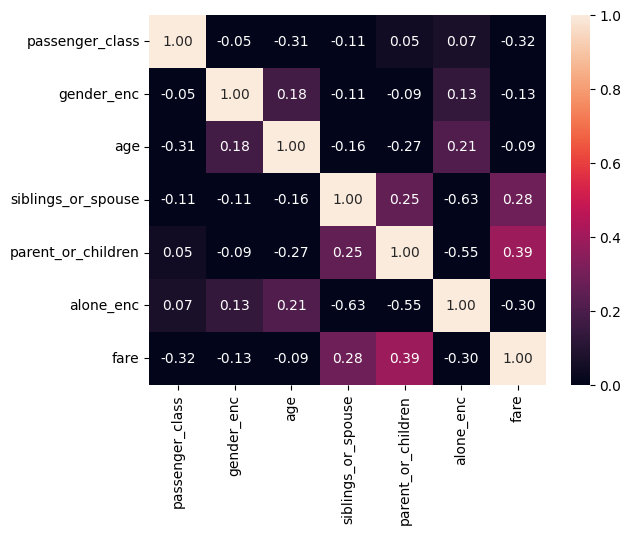

In [ ]:
sns.heatmap(df_corr, vmin=0, vmax=1, annot=True, fmt='.2f')

In [ ]:
from sklearn.model_selection import train_test_split

df_feat = ins_titanic_2[['passenger_class',
                         'gender_enc',
                         'age',
                         'siblings_or_spouse',
                         'parent_or_children',
                         'alone_enc',
                         'fare'
                    ]]

X = df_feat.iloc[:, 0:-1]
y = df_feat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54, test_size=0.3)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# y = a + B*X
# a = model.intercept_
# B = model.coef_

model.intercept_, model.coef_

(144.3763767216708,
 array([-48.39227447, -15.53140225,  -0.48475345,  12.15002633,
         31.01647017, -10.37553561]))

In [ ]:
intercept = model.intercept_
coefficients = model.coef_

print("Intercept (a):", intercept)
print("Coefficients (B):", coefficients)

Intercept (a): 144.3763767216708
Coefficients (B): [-48.39227447 -15.53140225  -0.48475345  12.15002633  31.01647017
 -10.37553561]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_pred, y_test)
sqrt_mse = np.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)

print(f"MSE : {mse:.3f}, MSE_SQRT : {sqrt_mse:.3f}, MAE : {mae:.3f}")

r2 = model.score(X_test, y_test)
print(f"R2 score: {r2:.3f}")

MSE : 5709.201, MSE_SQRT : 75.559, MAE : 38.488
R2 score: 0.169


In [ ]:
df_feat['fare'].min(), df_feat['fare'].max(), df_feat['fare'].max() - df_feat['fare'].min()

(0.0, 512.3292, 512.3292)

In [ ]:
df_feat.columns

Index(['passenger_class', 'gender_enc', 'age', 'siblings_or_spouse',
       'parent_or_children', 'alone_enc', 'fare'],
      dtype='object')

In [ ]:
#model prediction- insert class(1,2,3), gender(0 for woman, 1 for man), age, sibilings or spouse(insert numb), parent or children (insert numb), if alone (0 for no, 1 for yes)
#the model will predict the price of the ticket for this person.

fare = model.predict( [[1, 0, 20, 3, 0, 0]] )
print('Predicted ticket fare = ', fare)

Predicted ticket fare =  [122.73911225]


In [ ]:
#same details, change gender.
fare = model.predict( [[1, 1, 20, 3, 0, 0]] )
print('Predicted ticket fare = ', fare)

Predicted ticket fare =  [107.20771]


In [ ]:
#same details, changed age.
fare = model.predict( [[1, 1, 50, 1, 0, 1]] )
print('Predicted ticket fare = ', fare)

Predicted ticket fare =  [57.98951828]


In [ ]:
fare = model.predict( [[2, 1, 40, 1, 3, 0]] )
print('Predicted ticket fare = ', fare)

Predicted ticket fare =  [117.86972443]


Mean Squared Error: 3538.2847056570604 ,:2f


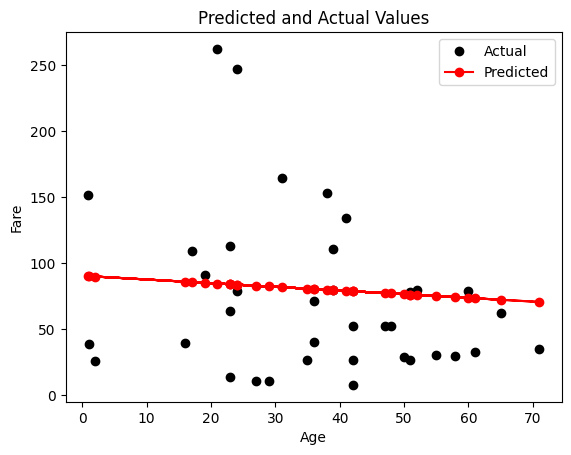

In [ ]:
# numerical features for prediction
features = titanic[['age']]

# Target variable
target = titanic['fare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse} ,:2f')

# Visualize the predictions vs. actual values
plt.plot(X_test['age'], y_test, 'o', color='black', label='Actual')
plt.plot(X_test['age'], predictions, 'o-', color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.title('Predicted and Actual Values')
plt.show()

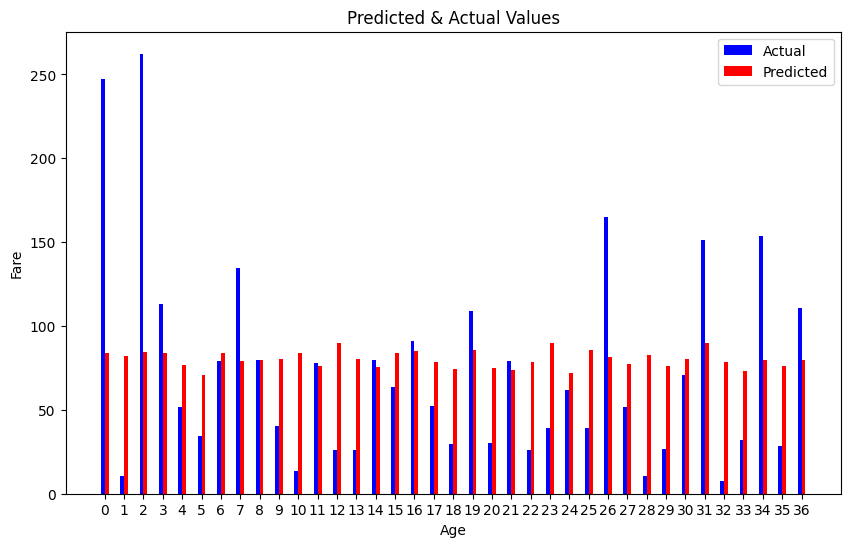

In [ ]:
# Calculate the indices for bars positions
indices = np.arange(len(X_test))

plt.figure(figsize=(10, 6))
bar_width = 0.20

# Visualize the predictions using a bar chart
plt.bar(indices, y_test, width=bar_width, color='blue', label='Actual')
plt.bar(indices + bar_width, predictions, width=bar_width, color='red', label='Predicted')

plt.xlabel('Age')
plt.ylabel('Fare')

# title
plt.title('Predicted & Actual Values')

plt.xticks(indices + bar_width / 2, indices)

plt.legend()

plt.show()